In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return 1 + x**2

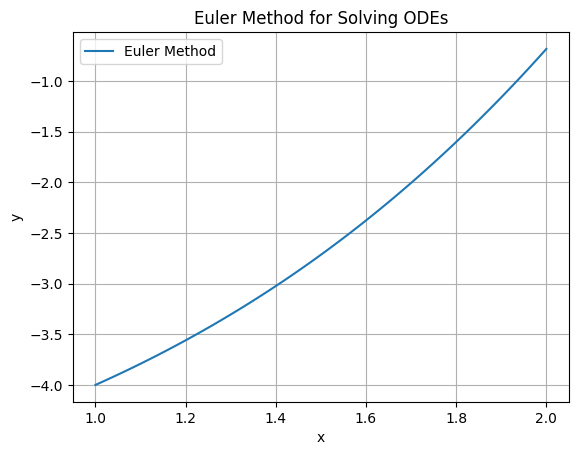

In [3]:
def euler_method(f, x0, y0, h, x_end):
    x_values = [x0]
    y_values = [y0]
    x = x0
    y = y0
    
    while x < x_end:
        y = y + h * f(x, y)
        x = x + h
        
        x_values.append(x)
        y_values.append(y)
    
    return x_values, y_values

x0 = 1
y0 = -4
h = 0.01   
x_end = 2.0

x_values, y_values = euler_method(f, x0, y0, h, x_end)

# for x, y in zip(x_values, y_values):
#     print(f"x: {x:.2f}, y: {y:.4f}")

plt.plot(x_values, y_values, label='Euler Method')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Euler Method for Solving ODEs')
plt.legend()
plt.grid(True)
plt.show()

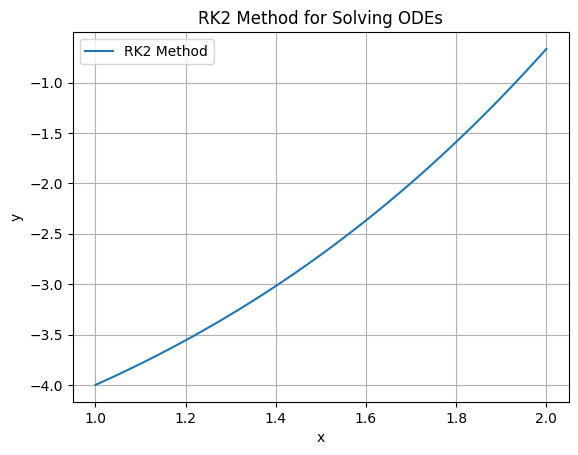

In [2]:
def runge_kutta_2(f, x0, y0, h, x_end):
    x_values = [x0]
    y_values = [y0]
    x = x0
    y = y0

    while x < x_end:
        k1 = h * f(x, y)
        k2 = h * f(x + 0.5 * h, y + 0.5 * k1)

        x = x + h
        y = y + k2

        x_values.append(x)
        y_values.append(y)

    return x_values, y_values

x0 = 1
y0 = -4
h = 0.01   
x_end = 2.0

x_values, y_values = runge_kutta_2(f, x0, y0, h, x_end)

plt.plot(x_values, y_values, label='RK2 Method')
plt.xlabel('x')
plt.ylabel('y')
plt.title('RK2 Method for Solving ODEs')
plt.legend()
plt.grid(True)
plt.show()

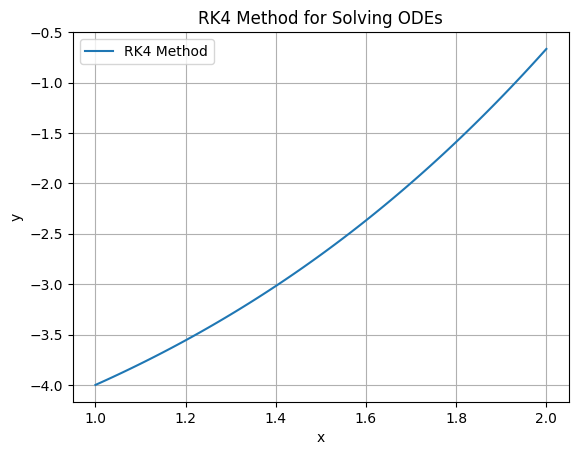

In [3]:
def runge_kutta_4(f, x0, y0, h, x_end):
    x_values = [x0]
    y_values = [y0]
    x = x0
    y = y0

    while x < x_end:
        k1 = h * f(x, y)
        k2 = h * f(x + 0.5 * h, y + 0.5 * k1 * h)
        k3 = h * f(x + 0.5 * h, y + 0.5 * k2 * h)
        k4 = h * f(x + h, y + k3 * h)
        
        x = x + h
        y = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

        x_values.append(x)
        y_values.append(y)

    return x_values, y_values

x0 = 1
y0 = -4
h = 0.01   
x_end = 2.0

x_values, y_values = runge_kutta_4(f, x0, y0, h, x_end)

plt.plot(x_values, y_values, label='RK4 Method')
plt.xlabel('x')
plt.ylabel('y')
plt.title('RK4 Method for Solving ODEs')
plt.legend()
plt.grid(True)
plt.show()

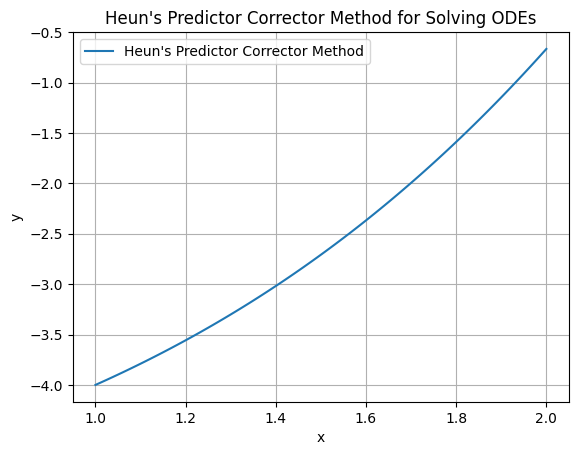

In [7]:
def heun_method(f, x0, y0, h, x_end):
    x_values = [x0]
    y_values = [y0]
    x = x0
    y = y0

    while x < x_end:
        y_predictor = y + h * f(x, y)
        y = y + 0.5 * h * (f(x, y) + f(x + h, y_predictor))
        x = x + h

        x_values.append(x)
        y_values.append(y)

    return x_values, y_values

x0 = 1
y0 = -4
h = 0.01   
x_end = 2.0

x_values, y_values = heun_method(f, x0, y0, h, x_end)

plt.plot(x_values, y_values, label='Heun\'s Predictor Corrector Method')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Heun\'s Predictor Corrector Method for Solving ODEs')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
def adams_bashforth_4(f, y0, x0, x_end, h, initial_values):
    n = int((x_end - x0) / h)
    x = np.linspace(x0, x_end, n+1)
    y = np.zeros(n+1)
    
    y[:4] = initial_values
    
    for i in range(3, n):
        y[i+1] = y[i] + h * (55*f(x[i], y[i]) - 59*f(x[i-1], y[i-1]) + 37*f(x[i-2], y[i-2]) - 9*f(x[i-3], y[i-3])) / 24
    
    return x, y

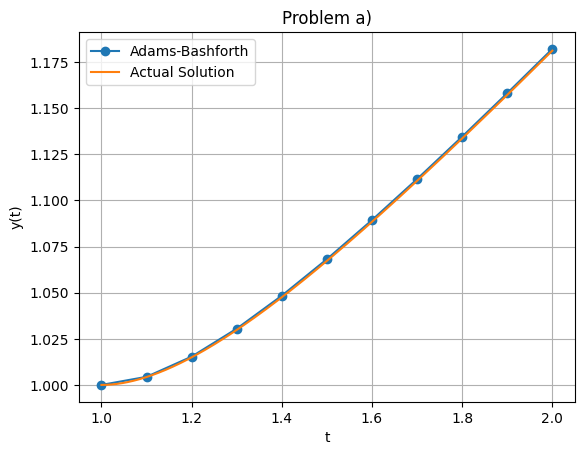

In [17]:
# sample exercise from UET course

def f1(t, y):
    return y/t - (y/t)**2

def actual_solution_1(t):
    return t / (1 + np.log(t))

params = [
    (f1, 1, 1, 2, 0.1, actual_solution_1),
]

for i, (f, y0, t0, t_end, h, actual_solution) in enumerate(params):
    t_rk, y_rk = runge_kutta_4(f, y0, t0, h, t0 + 3*h)
    
    t_ab, y_ab = adams_bashforth_4(f, y0, t0, t_end, h, y_rk)
    
    t_actual = np.linspace(t0, t_end, 1000)
    y_actual = actual_solution(t_actual)
    
    plt.figure()
    plt.plot(t_ab, y_ab, 'o-', label='Adams-Bashforth')
    plt.plot(t_actual, y_actual, '-', label='Actual Solution')
    plt.title(f'Problem {chr(97 + i)})')
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [32]:
def milne_simpson(f, y0, t0, t_end, h, initial_values):
    n_steps = int((t_end - t0) / h)
    t = np.linspace(t0, t_end, n_steps + 1)
    y = np.zeros(n_steps + 1)
    
    y[:4] = initial_values

    for i in range(2, n_steps):
        y_pred = y[i-3] + 4 * h * (2 * f(t[i-2], y[i-2]) - f(t[i-1], y[i-1]) + 2 * f(t[i], y[i])) / 3
        y_corr = y[i-1] + h * (f(t[i-1], y[i-1]) + 4 * f(t[i], y[i]) + f(t[i+1], y_pred)) / 3
        y[i + 1] = y_corr

    return t, y

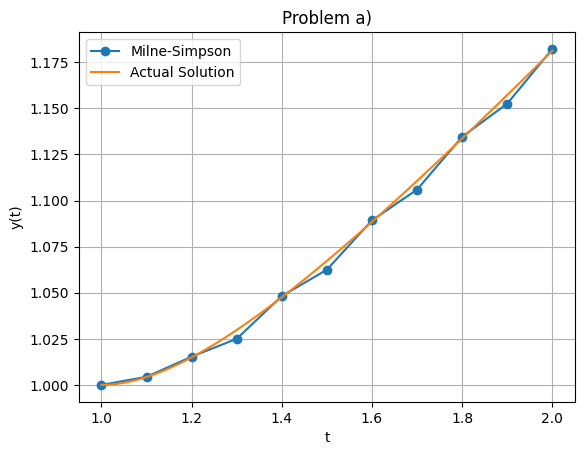

In [33]:
def f1(t, y):
    return y/t - (y/t)**2

def actual_solution_1(t):
    return t / (1 + np.log(t))

params = [
    (f1, 1, 1, 2, 0.1, actual_solution_1),
]

for i, (f, y0, t0, t_end, h, actual_solution) in enumerate(params):
    t_rk, y_rk = runge_kutta_4(f, y0, t0, h, t0 + 3*h)
    t_ms, y_ms = milne_simpson(f, y0, t0, t_end, h, y_rk)
    
    t_actual = np.linspace(t0, t_end, 1000)
    y_actual = actual_solution(t_actual)
    
    plt.figure()
    plt.plot(t_ms, y_ms, 'o-', label='Milne-Simpson')
    plt.plot(t_actual, y_actual, '-', label='Actual Solution')
    plt.title(f'Problem {chr(97 + i)})')
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [43]:
def adams_moulton(f, y0, t0, t_end, h, initial_values, tol=1e-6, max_iter=100):
    n_steps = int((t_end - t0) / h)
    t = np.linspace(t0, t_end, n_steps + 1)
    y = np.zeros(n_steps + 1)
    
    y[:4] = initial_values

    for i in range(1, n_steps):
        y_pred = y[i] + h * f(t[i], y[i])
        
        y_next = y_pred
        for _ in range(max_iter):
            y_new = y[i] + h / 2 * (f(t[i], y[i]) + f(t[i+1], y_next))
            if np.abs(y_new - y_next) < tol:
                break
            y_next = y_new
        
        y[i + 1] = y_next
    
    return t, y

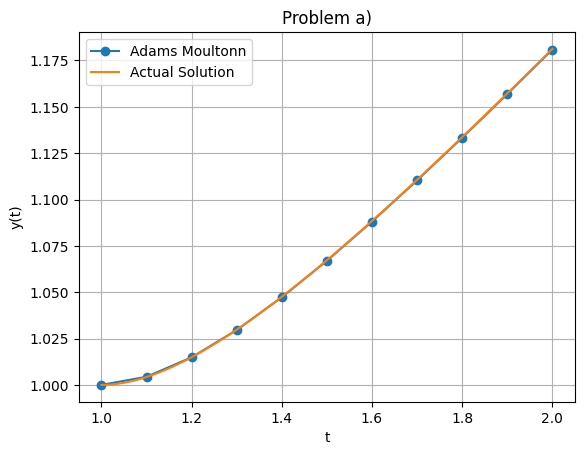

In [45]:
def f1(t, y):
    return y/t - (y/t)**2

def actual_solution_1(t):
    return t / (1 + np.log(t))

params = [
    (f1, 1, 1, 2, 0.1, actual_solution_1),
]

for i, (f, y0, t0, t_end, h, actual_solution) in enumerate(params):
    t_rk, y_rk = runge_kutta_4(f, y0, t0, h, t0 + 3*h)
    t_ms, y_ms = adams_moulton(f, y0, t0, t_end, h, y_rk)
    
    t_actual = np.linspace(t0, t_end, 1000)
    y_actual = actual_solution(t_actual)
    
    plt.figure()
    plt.plot(t_ms, y_ms, 'o-', label='Adams Moultonn')
    plt.plot(t_actual, y_actual, '-', label='Actual Solution')
    plt.title(f'Problem {chr(97 + i)})')
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.legend()
    plt.grid(True)
    plt.show()